In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as mtick


In [2]:
n_episode = 10
n_step = 100

algo_chosen = [0, 4, 8, 11, 13]

data_all = np.zeros((len(algo_chosen), n_episode, n_step))
file_per_algo = [[f'data/_res_loss_all_algo-{algo}_{i}.pt' for i in range(n_episode)] for algo in algo_chosen]

for i, algo in enumerate(file_per_algo):
    for j, file in enumerate(algo):
        data_all[i, j] = torch.load(file).detach().numpy()

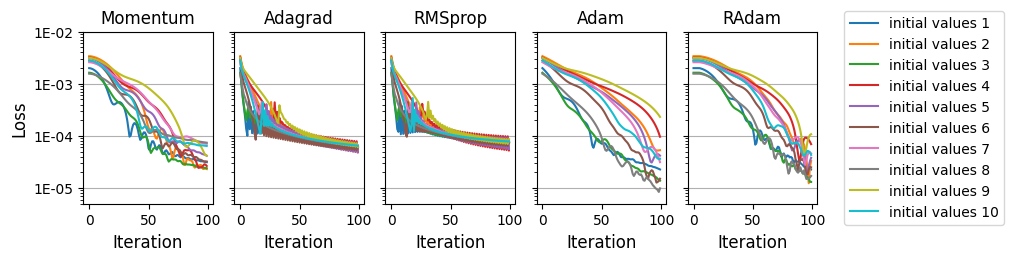

In [3]:
legend_list = ['Momentum', 'Adagrad', 'RMSprop', 'Adam', 'RAdam']

fig, axs = plt.subplots(1,len(legend_list), figsize=(10,2.5), layout='constrained', sharex=True, sharey=True)

for i, ax in enumerate(axs.flat):
    data0 = data_all[i].T
    x = range(data0.shape[-2])

    for j, data in enumerate(data0.T):
        mylabel = f'initial values {j+1}'            
        ax.plot(x, data, label=mylabel)
    
    ax.set_yscale('log')
    ax.set_ylim((5E-6, 1E-2))
    ax.set_title(legend_list[i])
    ax.set_xlabel('Iteration', fontsize=12)
    ax.yaxis.grid()

plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.E'))

axs[0].set_ylabel('Loss', fontsize=12)
axs[-1].legend(loc='right', bbox_to_anchor=(2.5, 0.5))

plt.show()